<a href="https://colab.research.google.com/github/Funmike-ai/redesigned-parakeet/blob/main/Online_sales_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's start importing necessary libraries that we'll use for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

let's use pandas to read our csv file as a dataframe

In [2]:
df = pd.read_csv('/content/online_sales_dataset.csv')
df.head()   #to load the first few rows of our dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,1/1/2020 0:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,1/1/2020 1:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,1/1/2020 2:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,1/1/2020 3:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,1/1/2020 4:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


for data cleaning and preprocessing let's check some information and current properties of our df

In [3]:
df.shape  #to check the number of rows and columns contained in our dataset

(45770, 17)

In [4]:
df.info()   #a more detailed information all at once

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45770 entries, 0 to 45769
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          45770 non-null  int64  
 1   StockCode          45770 non-null  object 
 2   Description        45770 non-null  object 
 3   Quantity           45770 non-null  int64  
 4   InvoiceDate        45770 non-null  object 
 5   UnitPrice          45770 non-null  float64
 6   CustomerID         41204 non-null  float64
 7   Country            45770 non-null  object 
 8   Discount           45770 non-null  float64
 9   PaymentMethod      45770 non-null  object 
 10  ShippingCost       43515 non-null  float64
 11  Category           45769 non-null  object 
 12  SalesChannel       45769 non-null  object 
 13  ReturnStatus       45769 non-null  object 
 14  ShipmentProvider   45769 non-null  object 
 15  WarehouseLocation  42582 non-null  object 
 16  OrderPriority      457

from the info above, we can see that some columns contains null values and the date column and a few others does not have the correct data type. let's address these issues with our dataset

In [5]:
df.isnull().sum()   #a quick sumup of the null values in each column

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,4566
Country,0
Discount,0
PaymentMethod,0


In [6]:
df['CustomerID']

,CustomerID
0,37039.0
1,19144.0
2,50472.0
3,96586.0
4,NaN
...,...
45765,78514.0
45766,NaN
45767,32009.0
45768,39438.0


In [7]:
df['ShippingCost']

,ShippingCost
0,10.79
1,9.51
2,23.03
3,11.08
4,NaN
...,...
45765,27.99
45766,NaN
45767,26.59
45768,5.50


In [8]:
df['WarehouseLocation']

,WarehouseLocation
0,London
1,Rome
2,Berlin
3,Rome
4,NaN
...,...
45765,Rome
45766,NaN
45767,London
45768,Berlin


In [9]:
df[['CustomerID','ShippingCost']] = df[['CustomerID','ShippingCost']].fillna(0)   #it's safer to fill the two columns with 0
df.isnull().sum() #has it been effected?

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Discount,0
PaymentMethod,0


In [10]:
df['WarehouseLocation'] = df['WarehouseLocation'].fillna('Unknown')   #let's stick with Unknown for ths column
df.isnull().sum()    #are we all good?

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Discount,0
PaymentMethod,0


In [11]:
df.columns   #just a quick look at my column index names

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [12]:
#remove decimal places from ID and invoice, convert them to str, we don't want to see the standard dev of customerID (LOL)
df[['CustomerID','InvoiceNo']] = df[['CustomerID','InvoiceNo']].astype(str).apply(lambda x: x.str.replace('.0', '', regex=False))
df[['CustomerID','InvoiceNo']]


,CustomerID,InvoiceNo
0,37039,221958
1,19144,771155
2,50472,231932
3,96586,465838
4,0,359178
...,...,...
45765,78514,539643
45766,0,651626
45767,32009,169389
45768,39438,602911


In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])    #convert the date column to the correct data type
df['InvoiceDate']

,InvoiceDate
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
45765,2025-03-21 21:00:00
45766,2025-03-21 22:00:00
45767,2025-03-21 23:00:00
45768,2025-03-22 00:00:00


In [14]:
#I think I'm good for now, let's check our dataframe's info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45770 entries, 0 to 45769
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          45770 non-null  object        
 1   StockCode          45770 non-null  object        
 2   Description        45770 non-null  object        
 3   Quantity           45770 non-null  int64         
 4   InvoiceDate        45770 non-null  datetime64[ns]
 5   UnitPrice          45770 non-null  float64       
 6   CustomerID         45770 non-null  object        
 7   Country            45770 non-null  object        
 8   Discount           45770 non-null  float64       
 9   PaymentMethod      45770 non-null  object        
 10  ShippingCost       45770 non-null  float64       
 11  Category           45769 non-null  object        
 12  SalesChannel       45769 non-null  object        
 13  ReturnStatus       45769 non-null  object        
 14  Shipme

Great!

lets's learn more about the basic summary statics of our numerical columns

In [15]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,Discount,ShippingCost
count,45770.000000,45770,45770.000000,45770.000000,45770.000000
mean,22.395346,2022-08-11 12:30:00,47.572787,0.275892,16.627195
min,-50.000000,2020-01-01 00:00:00,-99.980000,0.000000,0.000000
25%,11.000000,2021-04-21 18:15:00,23.680000,0.130000,10.300000
50%,23.000000,2022-08-11 12:30:00,48.890000,0.260000,16.820000
75%,37.000000,2023-12-01 06:45:00,74.570000,0.380000,23.410000
max,49.000000,2025-03-22 01:00:00,100.000000,1.999764,30.000000
std,17.885348,NaN,33.389122,0.229523,7.990396


I'm seeing all bunch of weird stuffs, a minimum quantity of -50? , a min Unit price of -~100?



A max InvoiceDate of 2025? (this is 2024, but we'll leave that)

In [16]:
returned = df[df['ReturnStatus'] == 'Returned']   #let's checke if they are associated with returned goods
returned[['Quantity','UnitPrice']]

,Quantity,UnitPrice
2,49,29.11
10,49,87.56
19,46,27.03
20,43,77.17
33,14,10.32
...,...,...
45709,16,84.31
45720,-18,41.20
45721,21,96.60
45739,39,98.66


In [17]:
#they are not, let's make them absolute value
df[['UnitPrice','Quantity']] = abs(df[['UnitPrice','Quantity']])
df.describe() #are we good

,Quantity,InvoiceDate,UnitPrice,Discount,ShippingCost
count,45770.000000,45770,45770.000000,45770.000000,45770.000000
mean,24.920581,2022-08-11 12:30:00,50.615737,0.275892,16.627195
min,1.000000,2020-01-01 00:00:00,1.000000,0.000000,0.000000
25%,13.000000,2021-04-21 18:15:00,25.940000,0.130000,10.300000
50%,25.000000,2022-08-11 12:30:00,50.520000,0.260000,16.820000
75%,37.000000,2023-12-01 06:45:00,75.340000,0.380000,23.410000
max,50.000000,2025-03-22 01:00:00,100.000000,1.999764,30.000000
std,14.156243,NaN,28.566487,0.229523,7.990396


In [18]:
#let's reduce the decimal places of all numerical columns to 2
numerical_columns = df.select_dtypes(include=['number']).columns #selects all numerical columns
df[numerical_columns] = df[numerical_columns].round(2)   #does the magic
df[numerical_columns]

,Quantity,UnitPrice,Discount,ShippingCost
0,38,1.71,0.47,10.79
1,18,41.25,0.19,9.51
2,49,29.11,0.35,23.03
3,14,76.68,0.14,11.08
4,30,68.11,1.50,0.00
...,...,...,...,...
45765,33,30.32,0.21,27.99
45766,31,3.15,0.17,0.00
45767,1,15.52,0.27,26.59
45768,1,94.67,0.01,5.50


In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,30,2020-01-01 04:00:00,68.11,0,United Kingdom,1.50,Bank Transfer,0.00,Electronics,In-store,Not Returned,FedEx,Unknown,Medium


I'm good with the cleaning for now


Let's start exploring the data set

EDA!!!

In [20]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [21]:
#make a list of all categorical columns
categorical_columns = df[['Description', 'Country', 'PaymentMethod', 'Category',
                          'SalesChannel', 'ReturnStatus','ShipmentProvider',
                          'WarehouseLocation', 'OrderPriority']]
# Get value counts for each categorical column
for column in categorical_columns:    # iterate over each column
    print(f"Value counts for column '{column}':") #to specify each column's name
    print(df[column].value_counts())     #to get the count of each unique value.
    print("\n")         #inserts a line break in the text, just make my output neater and more readable

Value counts for column 'Description':
Description
Wall Clock        4239
Backpack          4206
USB Cable         4199
Headphones        4190
Office Chair      4185
White Mug         4177
Blue Pen          4151
Desk Lamp         4149
T-shirt           4105
Notebook          4087
Wireless Mouse    4082
Name: count, dtype: int64


Value counts for column 'Country':
Country
France            3913
Germany           3882
Sweden            3874
United Kingdom    3839
Netherlands       3838
Portugal          3828
Belgium           3826
Australia         3791
Spain             3770
Norway            3769
United States     3732
Italy             3708
Name: count, dtype: int64


Value counts for column 'PaymentMethod':
PaymentMethod
Bank Transfer    15429
Credit Card      15196
paypall          15144
Credit C             1
Name: count, dtype: int64


Value counts for column 'Category':
Category
Furniture      9284
Accessories    9159
Stationery     9152
Electronics    9126
Apparel        9048
N

Our categorical data are quite uniform in thier counts except for the return status columns that shows that less goods are returned. Let's visualize it for better comprehension

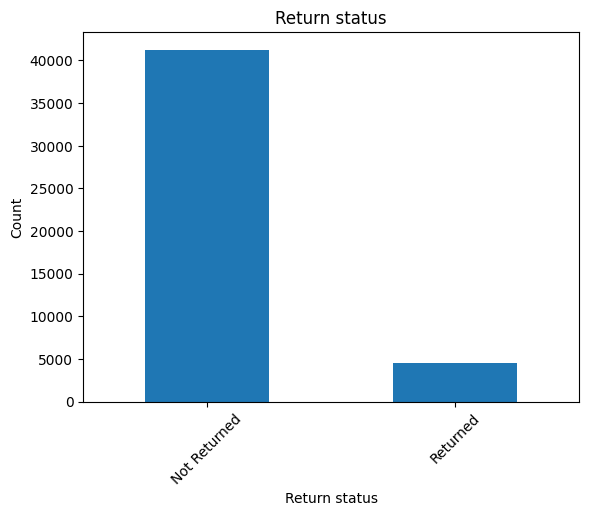

In [22]:
PaymentMethod = df['ReturnStatus'].value_counts()
PaymentMethod.plot(kind = 'bar', xlabel='Return status', ylabel='Count', title ='Return status')
plt.xticks(rotation = 45)
plt.show()

In [23]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

Many goods were not returned, but the ones that were, why?

The limitations of the Dataset for identifying reasons for returns is that, from the available columns, the dataset does not provide direct customer feedback or specific return reasons, which are crucial to understanding why goods were returned. Without qualitative information (e.g., defective items, wrong size, delayed shipment), it is challenging to determine the exact reasons for returns.
Nonetheless, let's look into various factors that could have influenced the returns and correlations between our variables....

1. Let's start with the customers behaviours

In [24]:
#Are there specific customers (CustomerID)who return items more frequently than others? max is 3times
returned['CustomerID'].value_counts()

,count
CustomerID,
0,471
29607,3
68423,3
53125,3
69408,2
...,...
42773,1
68899,1
63229,1


In [25]:
#Do customers from certain countries have a higher return rate? Australia
returned['Country'].value_counts()

,count
Country,
Germany,399
Sweden,391
Australia,390
Belgium,385
United States,380
France,378
United Kingdom,372
Italy,366
Portugal,365


In [26]:
#Is there a relationship between the SalesChannel and returns?
#To determine if there’s a meaningful relationship, let us calculate the proportion of returns relative to total orders for each sales channels

total_orders = df['SalesChannel'].value_counts()
returned_orders = returned['SalesChannel'].value_counts()

# Calculate return rate
return_rate = (returned_orders / total_orders) * 100
return_rate


,count
SalesChannel,
Online,9.811337
In-store,9.857237


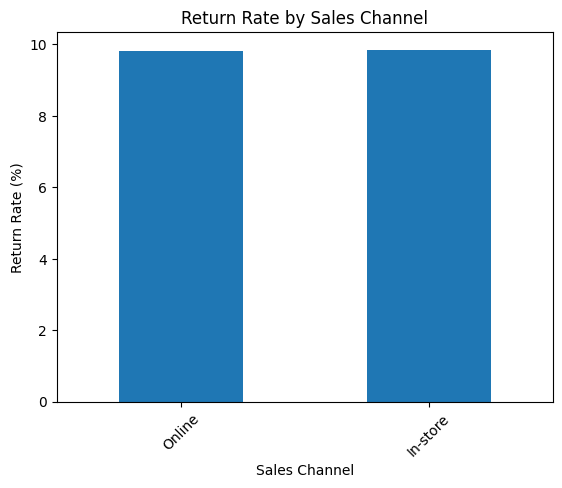

In [27]:
#the return rate is approx 10% for each sales channel, let's visualize
return_rate.plot(kind='bar', xlabel='Sales Channel', ylabel='Return Rate (%)', title='Return Rate by Sales Channel')
plt.xticks(rotation=45)
plt.show()


2. Let's proceed to check the Product Attributes...



In [29]:
#Are certain categories of products (e.g., electronics, clothing) more prone to returns?
returned['Category'].value_counts(normalize = True) * 100

,proportion
Category,
Furniture,20.684292
Stationery,20.328816
Electronics,20.084426
Apparel,19.506776
Accessories,19.395690


In [30]:
#Do specific StockCodes or product (Descriptions) have higher return rates?
returned['Description'].value_counts(normalize = True) * 100

,proportion
Description,
Wall Clock,9.708954
Notebook,9.464563
USB Cable,9.375694
Blue Pen,9.331260
Backpack,9.175739
T-shirt,9.086870
Headphones,8.864697
Desk Lamp,8.864697
Wireless Mouse,8.775828


In [33]:
#What is the relationship between the Quantity of items purchased and returns?
qty_purchased = df['Quantity'].sum()
qty_returned = returned['Quantity'].sum()

#Calculate return rate
return_rate = qty_returned / qty_purchased
print(f"Return Rate: {return_rate:.2%}")


Return Rate: 8.88%


In [35]:
df['Return Rate'] = returned['Quantity'] / df['Quantity']
df['Return Rate'].mean()


0.9000222172850477

In [39]:
df['ReturnQuantity'] = returned['Quantity']
df['ReturnQuantity'].isnull().sum()

41269

In [42]:
df['ReturnQuantity']=df['ReturnQuantity'].fillna(0)
df['ReturnQuantity'].isnull().sum()

0

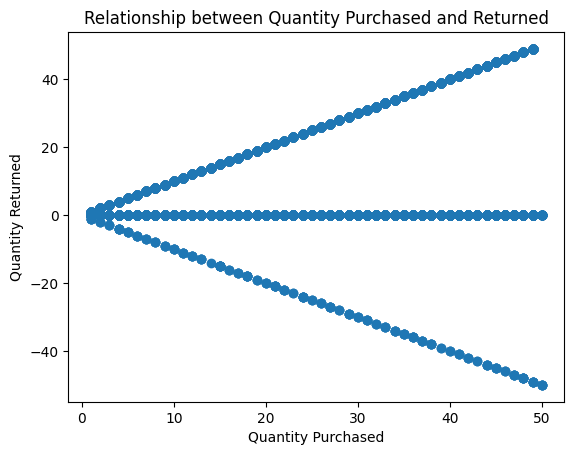

In [43]:
plt.scatter(df['Quantity'], df['ReturnQuantity'])
plt.title('Relationship between Quantity Purchased and Returned')
plt.xlabel('Quantity Purchased')
plt.ylabel('Quantity Returned')
plt.show()


In [45]:
correlation = df[['Quantity', 'ReturnQuantity']].corr()
print(correlation)


                Quantity  ReturnQuantity
Quantity        1.000000        0.144727
ReturnQuantity  0.144727        1.000000
